# Introduction to Adversarial Attacks

# 1. Loading a CNN
To save time, we will use a pretrained CNN (on the CIFAR-10 dataset) in order to test various adversarial methods. It has a straight-forward architecture, which is shown below. To save having to store the model architecture as a file, only the weights can be stored, and the model architecture can be replicated as follows.

CIFAR-10 is a database of 60,000 images of 10 classes - plane, car, bird, cat, deer, dog, frog, horse, ship, truck


Hint: Remember to use the activation function appropriately

In [ ]:
import torch
from torch.nn import Conv2d, MaxPool2d, Flatten, Linear, ReLU, Dropout #All of the necessary layers for this model

loss_fn = torch.nn.CrossEntropyLoss()

class CNN(torch.nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = Conv2d(3, 16, kernel_size = 3, padding = 1)
        self.pooling = MaxPool2d(2,2)
        self.dropout = Dropout(p=0.3)
        self.conv2 = Conv2d(16, 32, kernel_size = 3, padding = 1)
        self.relu = ReLU()
        self.flatten = Flatten()
        self.linear1 = Linear(2048, 128)
        self.linear2 = Linear(128, 10)

    def forward(self, x):
        #TODO
        #Build the model here:
        #Conv1, pooling, dropout, conv2, pooling, flatten, linear1, dropout, linear2
        return x

In [ ]:
model = CNN()
model.load_state_dict(torch.load('CNN_weights.pth'))
model.eval() #Puts the model on 'eval mode', stopping Dropout operations

# 2. Loading and Processing Images
Write a function that converts 'truck.jpg' into a transformed pytorch tensor, sizes it to (32,32) , and normalizes it.

Hint: Use transforms from torchvision.transforms

Hint2: Use Resize, ToTensor, Normalize

In [ ]:
from torchvision.io import read_image
from torchvision.transforms import Compose, Resize, ToTensor, Normalize
from PIL import Image

def process_image(path):
    img = Image.open(path)
    ###TODO
    #Write a PyTorch image composition to resize, convert to a tensor, and normalize the image
    transform = None;
    ###
    processedImg = transform(img)
    processedImg = processedImg.unsqueeze(0)
    return processedImg

In [ ]:
import matplotlib.pyplot as plt

def show_image(img):
    img = img.squeeze(0)
    img = img / 2 + 0.5 #Undo normalization (Normalization = (x - mean) / std)
    plt.imshow(img.permute(1, 2, 0).detach().numpy()) #Reorder columns 

show_image(process_image('frog.jpg'))

## 2a. Making Predictions
Using the function you created above, predict what the model classifies the frog to be.

If prediction leads to an error, the CNN was likely constructed incorrectly


In [ ]:
def prediction(img):
    classes = ['plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck']
    with torch.no_grad(): #Stops calculating gradients
        prediction = model(img)
        _, pred_class = torch.max(prediction, 1)
    probs = prediction.softmax(dim=-1) #Softmax function used to calculate probabilities
    return pred_class, classes[pred_class], probs[0][pred_class]

###TODO
#Use the above functions to predict 'frog.jpg'


# 3. Making an adversarial image using FGSM
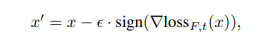
Using the above formula, complete the code for FGSM

In [ ]:
import numpy as np

def FGSM_generator(path, y, e = 0.1):
    x = process_image(path)
    x.requires_grad = True
    output = model(x)

    ### TODO
    # Calculate the loss
    # Calculate the gradient with respect to input data
    # Perturb the image using the signs of the gradient
    ###
        
    return None

path = 'frog.jpg'
x_adv_FGSM = FGSM_generator(path, prediction(process_image(path))[0], e = 0.05)
pred = prediction(x_adv_FGSM)
print(f"Prediction: {pred[1]} with probability {pred[2][0]:.2f}")

In [ ]:
show_image(x_adv_FGSM)

# 4. Making an adversarial image using IGSM 
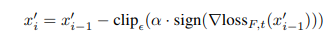
Using the above formula, complete the code for IGSM

In [ ]:
def IGSM_generator(path, y, e=0.1, alpha=0.01, num_iters=1):
    
    ### TODO
    #Implement Iterative FGSM using your code for FGSM
    ###

    return None
    
path = 'frog.jpg'
x_adv_IGSM = IGSM_generator(path, prediction(process_image(path))[0], num_iters = 5)
pred = prediction(x_adv_IGSM)
print(f"Prediction: {pred[1]} with probability {pred[2][0]:.2f}")

In [ ]:
show_image(x_adv_IGSM)

# 5. Making an adversarial image using PGD

In [ ]:
def add_noise(img, stdev=0.01, mean=0):
    noise = torch.randn_like(img) * stdev + mean
    return img + noise


def PGD_generator(path, y, e=0.2, alpha=0.01, num_iters=15):

    ###TODO
    # Implement PGD using your code for IGSM and the add_noise function
    ###

    return None


path = 'frog.jpg'
x_adv_PGD = PGD_generator(path, prediction(process_image(path))[0], num_iters = 12)
pred = prediction(x_adv_PGD)
print(f"Prediction: {pred[1]} with probability {pred[2][0]:.2f}")

In [ ]:
show_image(x_adv_PGD)

# 6. Evaluating the distance


Now, we will evaluate the distance between the original image and the adversarial images.

Using the below formula:
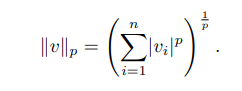
Where v is the absolute difference between the input image and the adversarially perturbed image, complete the following function. This is equivalent to calculating the L_p norm.

Due to the addition of random noise, the distance for PGD will fluctuate above and below that of IGSM if they have the same parameters.

In [ ]:
def distance(x1, x2, p):
    ### TODO
    return None

In [ ]:
x = process_image('frog.jpg')
print(distance(x, x_adv_FGSM, 2))
print(distance(x, x_adv_IGSM, 2))
print(distance(x, x_adv_PGD, 2))